# Pre-processing of visual input

Images are pre-processed through the application of the histogram of oriented gradients (HOG) algorithm.

The Pre-processing algorithm is applied to the images to make them suitable to be encoded into the neural circuits. It is inspired by the computations that take place in the first layers of the visual system of the primates,but it is not a realistic description of them.

1. The HOG filter is applied (14x14 cell size, 14x14 block size, 9 orientation bins and 7x7 block stride).

2. The size of original images is 28 × 28 pixel.

3. Histograms are computed using cells of 14 × 14 size that are applied on the images using a striding step of 7 pixels, resulting in 9 histograms per image.

4. Each cell provides an histogram with 9 bins, each bin assuming a real value.

5. 4 values binning: Each bin is then transformed into a vector of 4 mutually exclusive truth values. The coding of each input feature from acontinuous domain of possible intensities, e.g from the (0.0,1.0) range of possible values,into the discrete activity of subsets of individual thalamic neurons should preserve, at least partially, a distance-like notion (UltraLow:[0; 0.25), MediumLow:[0.25; 0.50), MediumHigh:[0.50; 0.75), High:[0.75,1.0]).

In summary, each image has been transformed in a vector of 324 binary features.

The resulting visual input is presented to the network through the thalamus, where each feature provides a binary input to a different thalamic cell.

HOG documentation: https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.hog

In [183]:
import numpy as np
from skimage.feature import hog
import matplotlib.pyplot as plt
import tensorflow as tf

In [184]:
mnist = tf.keras.datasets.mnist # 28 x 28 pixels
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [185]:
sample_image = x_train[4]

# Simplified code
- No 7x7 stride
- No 4 bin truth values

In [186]:
# def hog_transformation(image):
#   """
#     Apply HOG (Histogram of Oriented Gradients) transformation to an image.

#     Parameters:
#     - image: Input image (2D array).

#     Returns:
#     - fd: HOG feature descriptor (1D array).
#     - hog_image: Image showing HOG features (2D array).
#     """

#   fd, hog_image = hog(
#       image, # MNIST sample image
#       orientations=9, # 9 bins
#       pixels_per_cell=(14, 14), # 14 x 14 pixels
#       cells_per_block=(1, 1), # 1 cell per block for 14 x 14 block size
#       visualize=True,
#       feature_vector=True
#       )

#   print("Feature vector:", feature_vector)
#   print("Feature vector length:", len(feature_vector))
#   print("Feature descriptor:", fd)
#   print("Feature descriptor length:", len(fd))

#   return fd, hog_image, feature_vector

# fd, hog_image, feature_vector = hog_transformation(sample_image)

In [187]:
# # Function to plot the original image and its HOG representation side by side
# def plot_images(original_image, hog_image):
#     plt.figure(figsize=(10, 5))

#     plt.subplot(1, 2, 1)
#     plt.imshow(original_image, cmap='gray')
#     plt.title('Original Image')
#     plt.axis('off')

#     plt.subplot(1, 2, 2)
#     plt.imshow(hog_image, cmap='gray')
#     plt.title('HOG Image')
#     plt.axis('off')

#     plt.show()

# # Plotting the original random image and its HOG representation
# plot_images(sample_image, hog_image)

# Hog transformation with stride code

In [188]:
# Corrected function for HOG transformation with specific stride
def hog_transformation_with_stride(image, stride=7):
    feature_vectors = []

    # Size of the image, cells, and blocks
    height, width = image.shape
    cell_size = block_size = 14

    # Iterate over the image with the given stride
    for y in range(0, height - cell_size + 1, stride):
        for x in range(0, width - cell_size + 1, stride):
            cell_region = image[y:y+cell_size, x:x+cell_size]

            # Calculate HOG features for the cell
            fd, hog_image = hog(
                cell_region,
                orientations=9,
                pixels_per_cell=(cell_size, cell_size),
                cells_per_block=(1, 1),
                visualize=True,
                feature_vector=True
            )

            feature_vectors.append(fd)

    # Concatenate all feature vectors
    feature_vector = np.concatenate(feature_vectors)

    print("Feature vector:", feature_vector)
    print("Feature vector length:", len(feature_vector))
    print("Feature descriptor:", fd)
    print("Feature descriptor length:", len(fd))

    return feature_vector, hog_image

# Apply the modified HOG transformation
# feature_vector, hog_image = hog_transformation_with_stride(sample_image)

In [189]:
def bin_feature_values(feature_vector):
    # Binning the feature values into four categories
    binned_vector = []

    for value in feature_vector:
        if value < 0.25:
            binned_vector.append([1, 0, 0, 0])  # UltraLow
        elif value < 0.50:
            binned_vector.append([0, 1, 0, 0])  # MediumLow
        elif value < 0.75:
            binned_vector.append([0, 0, 1, 0])  # MediumHigh
        else:
            binned_vector.append([0, 0, 0, 1])  # High

    return np.array(binned_vector).flatten() # flattening preserves properties but in 1-dimension array

# Bin the feature vector values
# binned_feature_vector = bin_feature_values(feature_vector)

In [190]:
# Function to plot the original image and its HOG representation side by side
def plot_images(original_image, hog_image):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Image')

    plt.show()

# Plotting the original sample image and its HOG representation
# plot_images(sample_image, hog_image)

Feature vector: [0.41049011 0.         0.19546443 0.41789258 0.41789258 0.21716949
 0.39357862 0.41789258 0.2594652  0.38777022 0.22175656 0.28084969
 0.38777022 0.38777022 0.37856621 0.35460294 0.38777022 0.03780066
 0.36014781 0.30524331 0.4210823  0.4210823  0.4210823  0.41133185
 0.25572006 0.         0.1029685  0.43937762 0.         0.18784964
 0.08509439 0.43937762 0.26329971 0.43937762 0.43937762 0.34049073
 0.37769285 0.27588264 0.22756847 0.37769285 0.37769285 0.37769285
 0.37769285 0.37769285 0.12723999 0.40453902 0.31073204 0.
 0.40453902 0.40453902 0.40453902 0.40453902 0.         0.29186725
 0.1338323  0.10788827 0.56087562 0.56087562 0.56087562 0.
 0.10235298 0.         0.12739124 0.43866571 0.08929545 0.43866571
 0.43866571 0.43866571 0.14356505 0.43866571 0.         0.09631918
 0.39509041 0.16320965 0.39509041 0.39509041 0.39509041 0.19179165
 0.39509041 0.         0.39509041]
Feature vector length: 81
Feature descriptor: [0.39509041 0.16320965 0.39509041 0.39509041 0.3

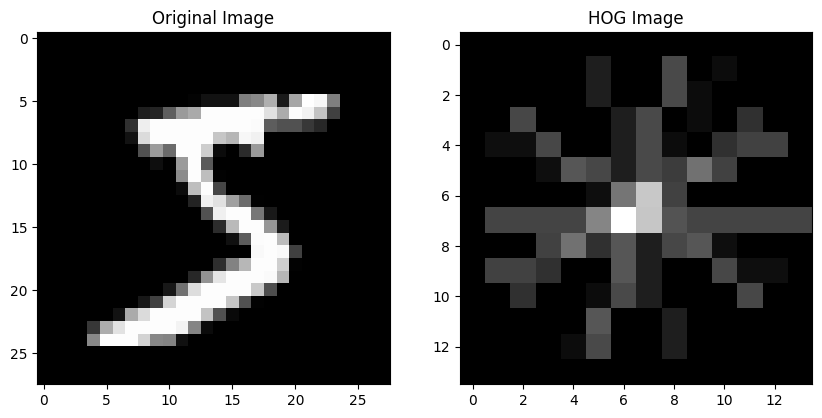

Feature vector: [0.46033312 0.39025092 0.46033312 0.46033312 0.46033312 0.
 0.         0.         0.00882605 0.39522951 0.39319226 0.39522951
 0.39522951 0.39522951 0.10843045 0.38502454 0.13305926 0.20704722
 0.38815918 0.09922072 0.38815918 0.22075693 0.38815918 0.19343297
 0.38815918 0.38815918 0.38815918 0.51821995 0.51821995 0.51821995
 0.21749022 0.31764124 0.         0.         0.19270465 0.09492742
 0.43135953 0.43135953 0.43135953 0.4223584  0.42640604 0.04218671
 0.18934158 0.12104151 0.17116409 0.42250916 0.42250916 0.42250916
 0.20725558 0.34681001 0.05405221 0.2425961  0.2468552  0.42250916
 0.41852255 0.19453735 0.21792762 0.15604599 0.41852255 0.34577658
 0.41852255 0.26477628 0.41852255 0.42517184 0.35570575 0.42517184
 0.42517184 0.42517184 0.27835294 0.18597632 0.15231029 0.1229759
 0.48578834 0.48578834 0.48578834 0.18819144 0.48578834 0.
 0.         0.02507885 0.14139938]
Feature vector length: 81
Feature descriptor: [0.48578834 0.48578834 0.48578834 0.18819144 0.48

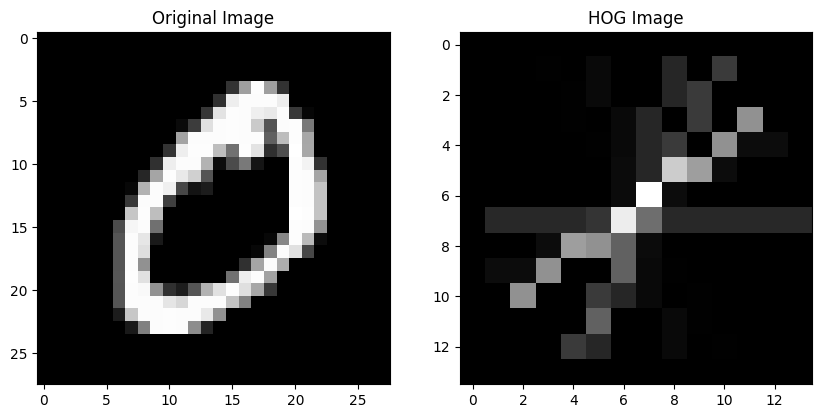

Feature vector: [0.66451735 0.66451735 0.27747919 0.         0.10530696 0.12842533
 0.         0.11070705 0.         0.5        0.5        0.5
 0.         0.5        0.         0.         0.         0.
 0.59403639 0.59403639 0.33309184 0.         0.35574068 0.
 0.         0.         0.23820146 0.48861428 0.36201235 0.
 0.48861428 0.48861428 0.20422136 0.23650992 0.21632861 0.09096125
 0.44048866 0.44048866 0.44048866 0.44048866 0.44048866 0.
 0.         0.06401075 0.16047223 0.54486145 0.54486145 0.4095829
 0.24387471 0.38014234 0.         0.         0.06882838 0.17254983
 0.47460427 0.         0.         0.47460427 0.47460427 0.24567776
 0.46807942 0.21165176 0.         0.44370619 0.40908169 0.06199751
 0.44370619 0.44370619 0.09068706 0.         0.18188897 0.44370619
 0.52260062 0.46171896 0.         0.20297077 0.38311059 0.10235593
 0.         0.20529295 0.52260062]
Feature vector length: 81
Feature descriptor: [0.52260062 0.46171896 0.         0.20297077 0.38311059 0.10235593
 0.  

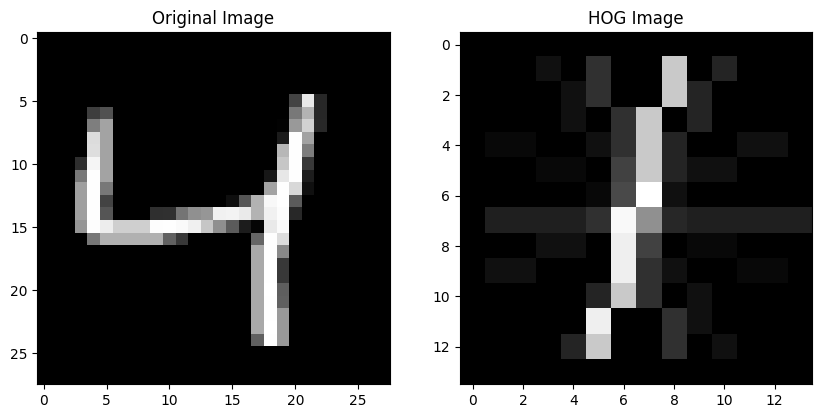

Feature vector: [0.70710678 0.         0.         0.         0.70710678 0.
 0.         0.         0.         0.49583707 0.49583707 0.49583707
 0.12870447 0.49583707 0.         0.         0.         0.00419101
 0.48343285 0.48343285 0.48343285 0.16478737 0.48343285 0.
 0.14793351 0.         0.12700988 0.48623667 0.48623667 0.48623667
 0.03039942 0.48623667 0.         0.00249356 0.         0.23100923
 0.57236284 0.57236284 0.57236284 0.01051665 0.09058219 0.
 0.00086264 0.         0.09426492 0.49970768 0.49970768 0.49970768
 0.03418995 0.49970768 0.         0.         0.         0.
 0.44269602 0.44269602 0.44269602 0.01814737 0.44269602 0.
 0.15960403 0.         0.43620885 0.4961273  0.4961273  0.4961273
 0.01434929 0.35563297 0.         0.12620034 0.         0.34491428
 0.57735027 0.57735027 0.         0.         0.57735027 0.
 0.         0.         0.        ]
Feature vector length: 81
Feature descriptor: [0.57735027 0.57735027 0.         0.         0.57735027 0.
 0.         0.        

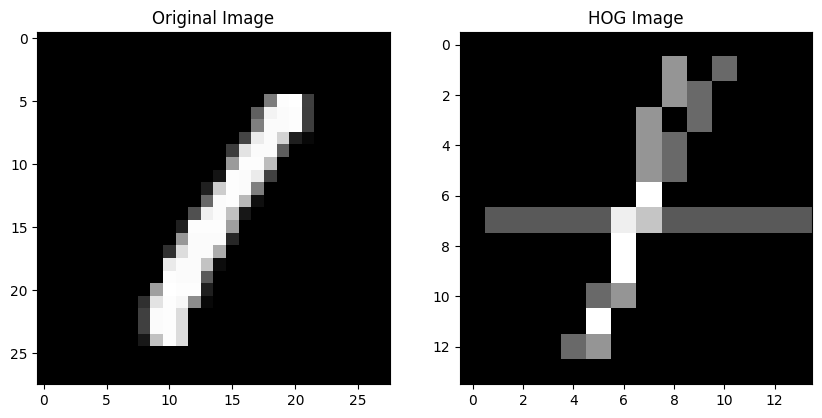

Feature vector: [0.58023822 0.24474685 0.58023822 0.         0.51647478 0.
 0.         0.         0.         0.46133555 0.46133555 0.46133555
 0.32380843 0.46133555 0.06789183 0.1876824  0.05797895 0.02511163
 0.42672905 0.42672905 0.42672905 0.18843341 0.42672905 0.12031786
 0.42672905 0.10275026 0.17020701 0.42404635 0.23987404 0.47678195
 0.42667645 0.47678195 0.         0.21316244 0.13449012 0.24984891
 0.43598582 0.43598582 0.43598582 0.43598582 0.43598582 0.05767629
 0.12383412 0.05767788 0.16611334 0.49002057 0.49002057 0.44609683
 0.15121828 0.49002057 0.09975412 0.05384819 0.08518903 0.19406826
 0.46585436 0.         0.22436338 0.40483272 0.46585436 0.
 0.46585436 0.29990693 0.21158098 0.41710287 0.29428114 0.13439402
 0.15859827 0.41710287 0.01759051 0.41710287 0.41710287 0.41710287
 0.46325937 0.44770592 0.10713111 0.02373675 0.35493691 0.
 0.46325937 0.26168544 0.4047727 ]
Feature vector length: 81
Feature descriptor: [0.46325937 0.44770592 0.10713111 0.02373675 0.35493691 

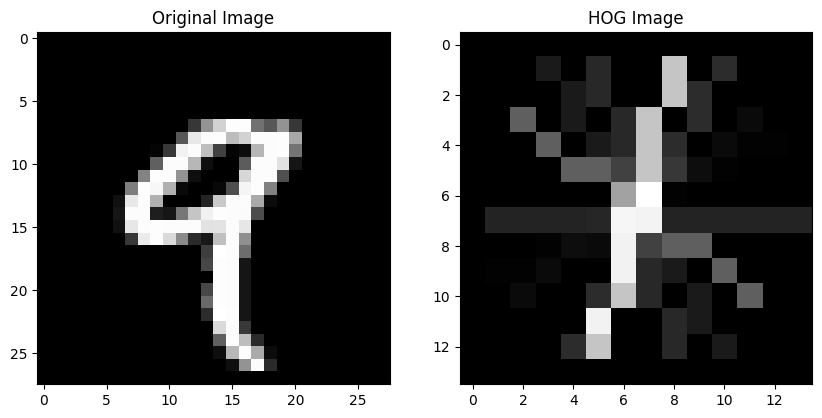

Feature vector: [0.34989522 0.44310468 0.44310468 0.44310468 0.44310468 0.11681274
 0.18123161 0.         0.21381345 0.42133621 0.36364366 0.42133621
 0.42133621 0.42133621 0.14185925 0.29346877 0.16577894 0.15471217
 0.43559459 0.18723556 0.37811702 0.43559459 0.43559459 0.11974283
 0.27715495 0.20644331 0.34492083 0.46511044 0.35037623 0.46511044
 0.46511044 0.46511044 0.04148331 0.06662765 0.         0.07593085
 0.45387031 0.3179599  0.45387031 0.45387031 0.45387031 0.17035501
 0.14794328 0.10437398 0.11448353 0.40938509 0.1609911  0.40938509
 0.2680074  0.40938509 0.40938509 0.40938509 0.18702915 0.17115272
 0.44732071 0.26014722 0.4644752  0.4644752  0.4644752  0.26988656
 0.10927093 0.         0.01539707 0.46101483 0.13411321 0.47436158
 0.47436158 0.47436158 0.24065118 0.16449098 0.08254762 0.05136005
 0.40342856 0.         0.40342856 0.36252035 0.40342856 0.40342856
 0.40342856 0.21567597 0.0910487 ]
Feature vector length: 81
Feature descriptor: [0.40342856 0.         0.4034285

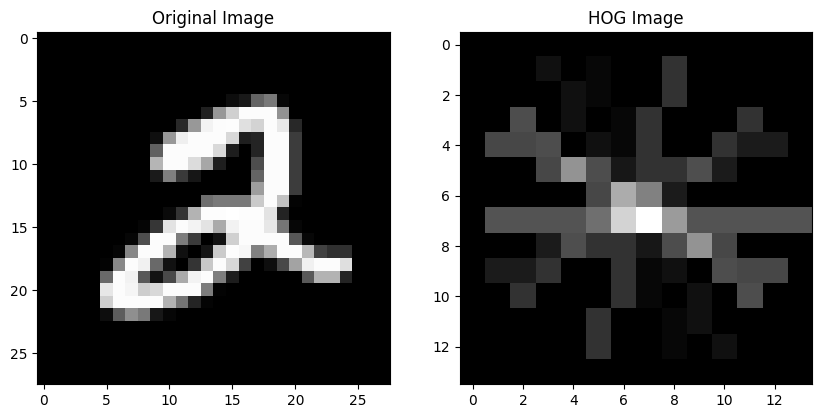

Feature vector: [4.46103503e-01 0.00000000e+00 3.24991040e-01 0.00000000e+00
 4.46103503e-01 0.00000000e+00 3.13604023e-01 4.46103503e-01
 4.46103503e-01 5.42943106e-01 0.00000000e+00 1.41502015e-01
 1.06276925e-01 2.60949890e-01 0.00000000e+00 4.19314051e-01
 3.67680356e-01 5.42943106e-01 5.04209178e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.04209178e-01 0.00000000e+00
 3.41574503e-01 3.47341580e-01 5.04209178e-01 5.63833056e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.09336571e-01
 0.00000000e+00 3.39528544e-01 2.85216601e-01 5.63833056e-01
 5.64868236e-01 0.00000000e+00 8.40607419e-04 0.00000000e+00
 5.94399214e-04 0.00000000e+00 2.06810459e-01 5.64868236e-01
 5.64868236e-01 5.59559817e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.74204766e-02 0.00000000e+00 2.44799000e-01
 5.59559817e-01 5.59559817e-01 7.07106781e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.07106781e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.10208868e-01
 0.00000

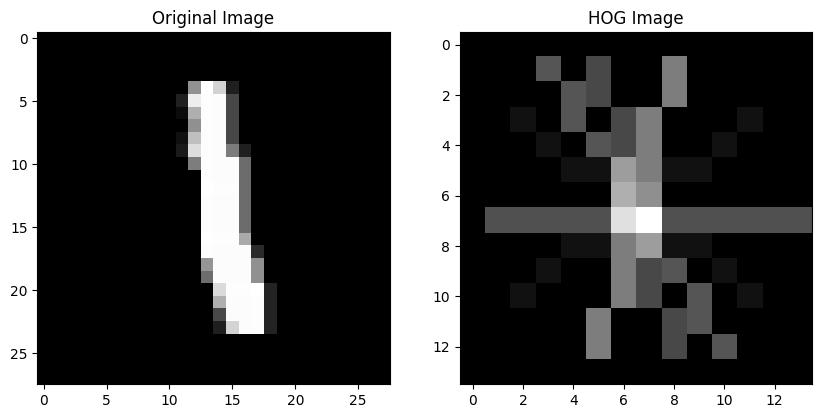

Feature vector: [0.48631114 0.         0.45679974 0.48631114 0.48631114 0.07676489
 0.18029574 0.20842032 0.         0.46939062 0.08663221 0.46939062
 0.46939062 0.46939062 0.2608869  0.07663844 0.18028227 0.06890225
 0.40592075 0.40592075 0.40592075 0.19600808 0.40592075 0.28359968
 0.32801443 0.29001135 0.17425664 0.50083238 0.         0.28667096
 0.50083238 0.50083238 0.22535874 0.2713588  0.17430095 0.10255516
 0.42263432 0.1045464  0.42263432 0.42263432 0.42263432 0.30054657
 0.20576304 0.20088788 0.31869791 0.42256995 0.42256995 0.42256995
 0.23726967 0.42256995 0.25517431 0.09609715 0.15466896 0.36217477
 0.38216025 0.0937695  0.40373126 0.42849175 0.42849175 0.28323158
 0.42849175 0.21396192 0.07311991 0.45127137 0.0295077  0.45127137
 0.45127137 0.45127137 0.26514818 0.2291049  0.13607675 0.20793367
 0.51397142 0.06191314 0.51397142 0.19788426 0.51397142 0.16169769
 0.16063844 0.09863342 0.32067011]
Feature vector length: 81
Feature descriptor: [0.51397142 0.06191314 0.5139714

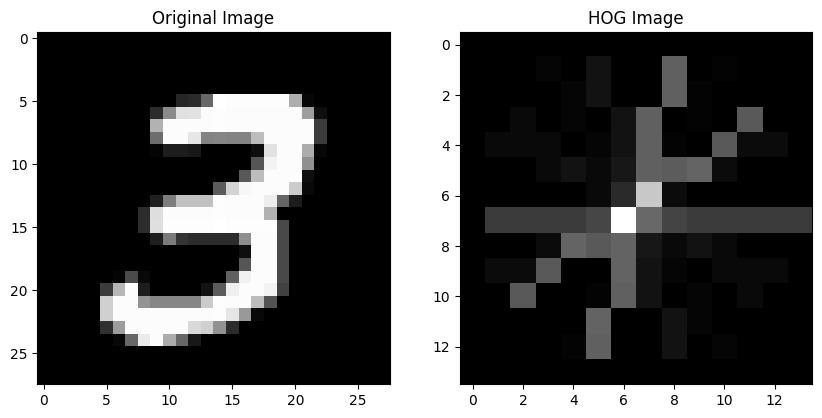

Feature vector: [0.57735027 0.         0.         0.         0.57735027 0.
 0.         0.         0.57735027 0.64730091 0.         0.3463644
 0.         0.15240097 0.1371449  0.         0.         0.64730091
 0.57735027 0.         0.         0.         0.57735027 0.
 0.         0.         0.57735027 0.57735027 0.         0.
 0.         0.57735027 0.         0.         0.         0.57735027
 0.62507004 0.         0.         0.         0.         0.
 0.         0.46751992 0.62507004 0.62469306 0.         0.
 0.         0.12506451 0.         0.         0.45152632 0.62469306
 0.70710678 0.         0.         0.         0.70710678 0.
 0.         0.         0.         0.5766286  0.13259779 0.
 0.1324261  0.19128996 0.         0.14570615 0.49199384 0.5766286
 0.53009043 0.23144905 0.         0.23114937 0.53009043 0.
 0.         0.22363747 0.53009043]
Feature vector length: 81
Feature descriptor: [0.53009043 0.23144905 0.         0.23114937 0.53009043 0.
 0.         0.22363747 0.53009043]
Feat

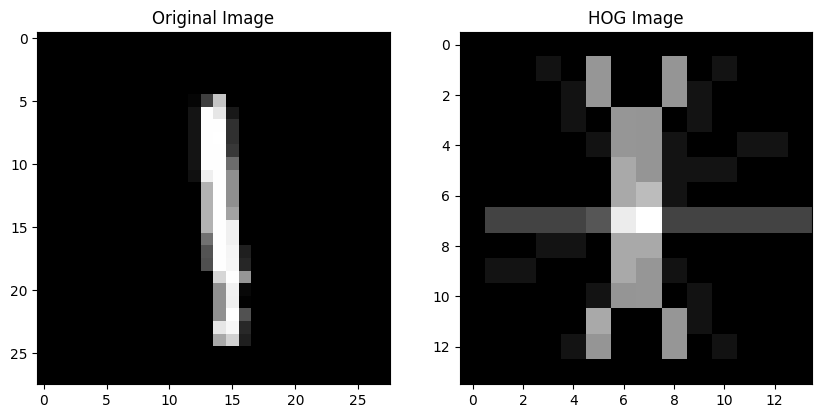

Feature vector: [0.5        0.5        0.5        0.         0.5        0.
 0.         0.         0.         0.48882623 0.48882623 0.48882623
 0.         0.48882623 0.         0.         0.08634338 0.19167804
 0.54594177 0.54594177 0.54594177 0.02373306 0.29500189 0.
 0.         0.12196151 0.05812722 0.43578778 0.43578778 0.43578778
 0.43303897 0.43578778 0.09494083 0.135444   0.15345438 0.04388856
 0.43689673 0.43689673 0.43689673 0.26545291 0.43689673 0.12685603
 0.16388043 0.21392608 0.27803978 0.46980631 0.46980631 0.46980631
 0.22943282 0.46980631 0.         0.01191368 0.1109279  0.22812669
 0.41879212 0.41879212 0.41879212 0.41879212 0.41879212 0.11053567
 0.30505884 0.13237631 0.01622582 0.41917235 0.41917235 0.41917235
 0.36008027 0.41917235 0.11948969 0.24719617 0.17445334 0.2484002
 0.42998507 0.19608525 0.42998507 0.42998507 0.42998507 0.
 0.02731859 0.22591417 0.41257535]
Feature vector length: 81
Feature descriptor: [0.42998507 0.19608525 0.42998507 0.42998507 0.42998507 0

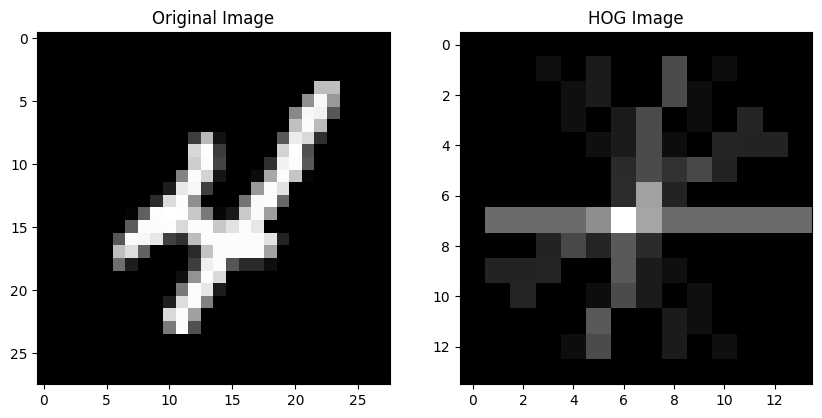

Feature vector: [0.39425973 0.17044592 0.39425973 0.39425973 0.39425973 0.
 0.39425973 0.39425973 0.19571347 0.34558563 0.30342029 0.34558563
 0.34558563 0.34558563 0.26819793 0.34558563 0.34558563 0.34558563
 0.38785759 0.36009023 0.         0.         0.38785759 0.34375496
 0.38785759 0.38785759 0.38785759 0.40075173 0.14316621 0.35382508
 0.40075173 0.40075173 0.16368114 0.40075173 0.40075173 0.15655665
 0.37991684 0.37991684 0.30717476 0.18867174 0.37991684 0.06344934
 0.37991684 0.37991684 0.37991684 0.45374586 0.45374586 0.14829816
 0.         0.42680558 0.         0.12676615 0.40264015 0.45374586
 0.43165156 0.02568181 0.11312209 0.34537476 0.43165156 0.43165156
 0.43165156 0.34923895 0.         0.38726884 0.38726884 0.38726884
 0.15609412 0.38726884 0.38726884 0.38726884 0.1293403  0.24298722
 0.43327582 0.43327582 0.43327582 0.         0.43327582 0.
 0.15724077 0.19140446 0.43327582]
Feature vector length: 81
Feature descriptor: [0.43327582 0.43327582 0.43327582 0.         0.4

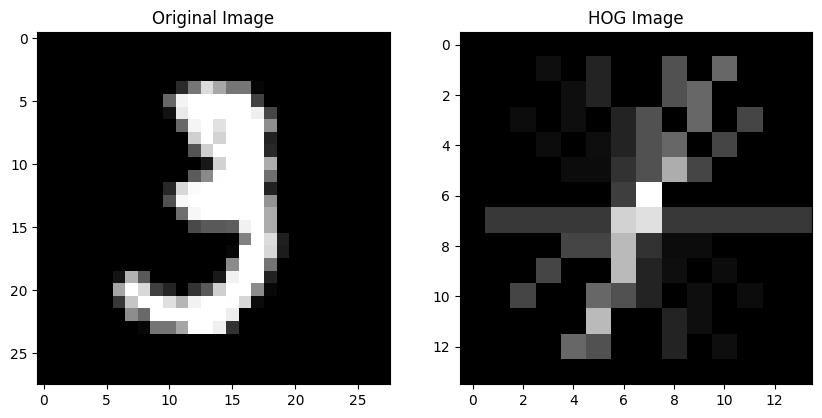

Feature vector: [0.57735027 0.         0.57735027 0.         0.57735027 0.
 0.         0.         0.         0.49734306 0.         0.49734306
 0.49734306 0.49734306 0.09303871 0.         0.         0.04408305
 0.17654601 0.13810073 0.55131821 0.55131821 0.55131821 0.12195656
 0.14686367 0.         0.03823677 0.47618307 0.13399443 0.47618307
 0.17391503 0.47618307 0.06541242 0.47618307 0.06355664 0.19099618
 0.43409375 0.20468697 0.43409375 0.36952249 0.43409375 0.08201884
 0.43409375 0.09877756 0.22654525 0.49017914 0.13015029 0.49017914
 0.49017914 0.49017914 0.         0.         0.0349586  0.14400148
 0.45165278 0.12133379 0.45165278 0.20087058 0.45165278 0.30942596
 0.45165278 0.05755141 0.17294966 0.46042919 0.11846661 0.46042919
 0.09193553 0.46042919 0.27618396 0.46042919 0.10946706 0.20315693
 0.56571868 0.         0.         0.         0.56571868 0.
 0.         0.19971761 0.56571868]
Feature vector length: 81
Feature descriptor: [0.56571868 0.         0.         0.         0.5

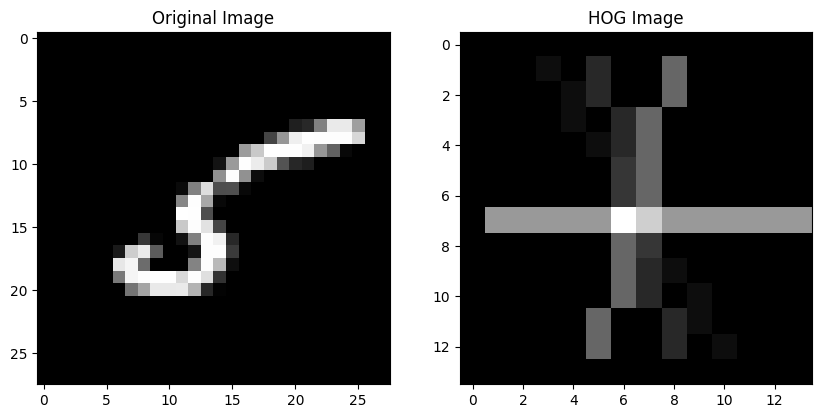

Feature vector: [0.3262015  0.23646356 0.49418149 0.43805639 0.58275969 0.23110862
 0.         0.09245955 0.         0.43086797 0.35908712 0.43086797
 0.06965943 0.43086797 0.43086797 0.08609139 0.33740499 0.04859353
 0.39760726 0.39760726 0.39760726 0.         0.39760726 0.39760726
 0.19607318 0.39760726 0.11404426 0.50054117 0.19055526 0.50054117
 0.1335657  0.50054117 0.36149125 0.15800413 0.1854019  0.06488008
 0.38156355 0.38156355 0.38156355 0.0662916  0.38156355 0.38156355
 0.38156355 0.3005397  0.17814843 0.38973398 0.38973398 0.22758876
 0.         0.38973398 0.38973398 0.38973398 0.38973398 0.19195812
 0.41676666 0.17367076 0.28687061 0.12421974 0.41676666 0.41676666
 0.41676666 0.41676666 0.06034024 0.35301539 0.18445854 0.39845297
 0.39845297 0.39845297 0.39845297 0.39845297 0.17484984 0.13022617
 0.37966118 0.37966118 0.37966118 0.37966118 0.37966118 0.04638566
 0.37966118 0.33645342 0.14068326]
Feature vector length: 81
Feature descriptor: [0.37966118 0.37966118 0.3796611

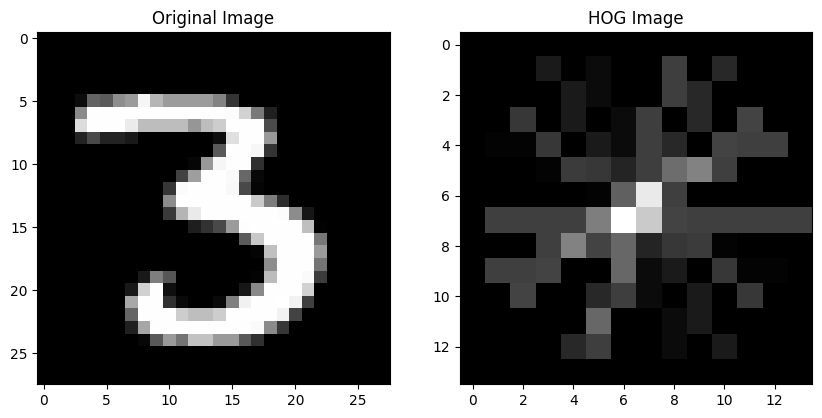

Feature vector: [0.48986832 0.48986832 0.48986832 0.07571323 0.48986832 0.
 0.         0.         0.18542823 0.45733575 0.45733575 0.45733575
 0.3779481  0.45733575 0.09532623 0.         0.07329421 0.0779241
 0.40776417 0.40776417 0.40776417 0.40776417 0.40776417 0.25847842
 0.16948818 0.27037861 0.         0.49317874 0.49317874 0.49317874
 0.03777974 0.28814697 0.         0.09004107 0.1068348  0.40785674
 0.46089086 0.46089086 0.46089086 0.33484214 0.46089086 0.10742974
 0.05157362 0.06534536 0.14045716 0.44273515 0.31467106 0.44273515
 0.44273515 0.44273515 0.23023466 0.20340605 0.10526777 0.10705683
 0.40123188 0.40123188 0.38668248 0.09962984 0.40123188 0.09645347
 0.40123188 0.16221024 0.40123188 0.41774198 0.41774198 0.41774198
 0.41774198 0.41774198 0.14314047 0.28929459 0.09131842 0.12222351
 0.45933328 0.38817198 0.45933328 0.45933328 0.45933328 0.07268049
 0.         0.0095822  0.        ]
Feature vector length: 81
Feature descriptor: [0.45933328 0.38817198 0.45933328 0.45933

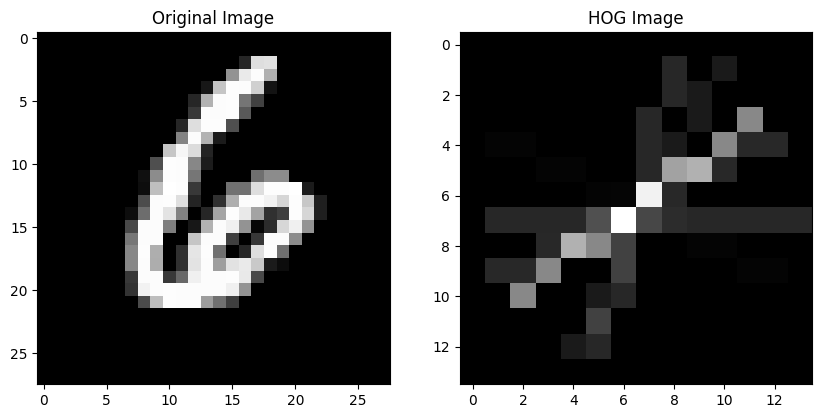

Feature vector: [0.46324097 0.         0.37633921 0.         0.46324097 0.
 0.         0.46324097 0.46324097 0.54634786 0.         0.1724278
 0.         0.22816403 0.15073773 0.         0.54634786 0.54634786
 0.51341641 0.         0.         0.         0.51341641 0.
 0.         0.45739563 0.51341641 0.88062044 0.         0.
 0.         0.00476985 0.         0.         0.35860652 0.30965505
 0.68964308 0.         0.         0.         0.         0.
 0.         0.3399691  0.6393852  0.65734911 0.         0.
 0.         0.23603646 0.         0.         0.28296834 0.65734911
 0.57735027 0.         0.         0.         0.57735027 0.
 0.         0.         0.57735027 0.66576213 0.         0.12238717
 0.         0.14901498 0.11743606 0.02899877 0.24840558 0.66576213
 0.55521562 0.         0.27423865 0.         0.55521562 0.
 0.         0.         0.55521562]
Feature vector length: 81
Feature descriptor: [0.55521562 0.         0.27423865 0.         0.55521562 0.
 0.         0.         0.55521

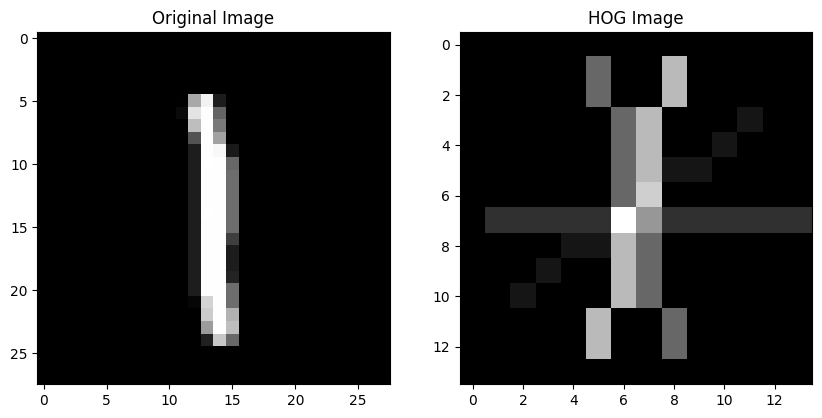

Feature vector: [0.4472136  0.4472136  0.4472136  0.4472136  0.4472136  0.
 0.         0.         0.         0.47428456 0.2554434  0.47428456
 0.47428456 0.47428456 0.16372904 0.         0.0728254  0.05342811
 0.43255784 0.43255784 0.05385943 0.43255784 0.43255784 0.2139693
 0.43255784 0.09517187 0.0820195  0.45595715 0.45595715 0.45595715
 0.37738911 0.45595715 0.11136825 0.11232769 0.03113448 0.
 0.45599064 0.45599064 0.45599064 0.38554858 0.45599064 0.09981603
 0.         0.04439739 0.08779563 0.47971998 0.47971998 0.47971998
 0.02659282 0.47971998 0.17747043 0.14602282 0.07893746 0.14042161
 0.49233464 0.49233464 0.49233464 0.08967489 0.49233464 0.
 0.         0.14961555 0.         0.55862922 0.55862922 0.55862922
 0.05413208 0.21899012 0.         0.         0.09031514 0.0689668
 0.4950115  0.4950115  0.4950115  0.         0.4950115  0.
 0.         0.         0.1409059 ]
Feature vector length: 81
Feature descriptor: [0.4950115 0.4950115 0.4950115 0.        0.4950115 0.        0.
 0

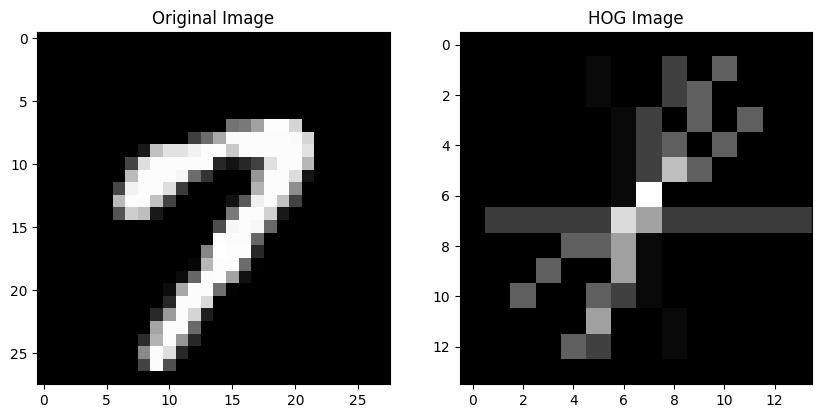

Feature vector: [0.44009276 0.44009276 0.44009276 0.44009276 0.44009276 0.
 0.         0.         0.1777408  0.34783082 0.26815349 0.34783082
 0.34783082 0.34783082 0.28493814 0.34783082 0.34783082 0.34783082
 0.43545798 0.         0.         0.         0.43545798 0.2277756
 0.43545798 0.43545798 0.43545798 0.47054682 0.32505368 0.47054682
 0.47054682 0.47054682 0.         0.         0.         0.09318192
 0.41775568 0.2183619  0.41775568 0.41775568 0.41775568 0.04971316
 0.00953124 0.27777114 0.41775568 0.42056303 0.07231972 0.42056303
 0.42056303 0.42056303 0.10956383 0.07281961 0.30511736 0.42056303
 0.43955053 0.         0.45109549 0.45109549 0.45109549 0.16664656
 0.37515977 0.07515929 0.14889279 0.36714078 0.09024154 0.51565153
 0.51565153 0.51565153 0.19528911 0.06275933 0.1140213  0.0655528
 0.48643304 0.16211367 0.48643304 0.48643304 0.48643304 0.11131141
 0.03150648 0.         0.11776179]
Feature vector length: 81
Feature descriptor: [0.48643304 0.16211367 0.48643304 0.486433

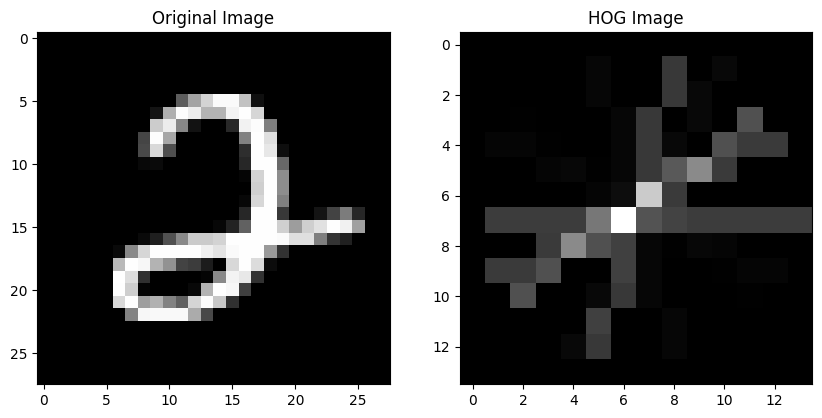

Feature vector: [0.40638115 0.40638115 0.3252792  0.26165866 0.40638115 0.
 0.         0.40638115 0.40638115 0.37449645 0.37449645 0.37449645
 0.37449645 0.37449645 0.17919304 0.06608823 0.37449645 0.34933745
 0.42017775 0.42017775 0.42017775 0.42017775 0.42017775 0.22415971
 0.18725145 0.         0.178725   0.42309416 0.42309416 0.42309416
 0.20912075 0.42309416 0.         0.         0.24743718 0.42309416
 0.40681175 0.40681175 0.40681175 0.37092509 0.38996056 0.1024303
 0.         0.25385704 0.37272319 0.46720805 0.46720805 0.46720805
 0.26700713 0.46720805 0.13695396 0.         0.         0.19187847
 0.41910981 0.41910981 0.41910981 0.41910981 0.41910981 0.16590728
 0.27005606 0.09883652 0.10728784 0.4399024  0.4399024  0.4399024
 0.38925328 0.4399024  0.17969138 0.17204643 0.         0.11196616
 0.53799515 0.51616297 0.27771866 0.         0.53799515 0.
 0.         0.         0.27851493]
Feature vector length: 81
Feature descriptor: [0.53799515 0.51616297 0.27771866 0.         0.537

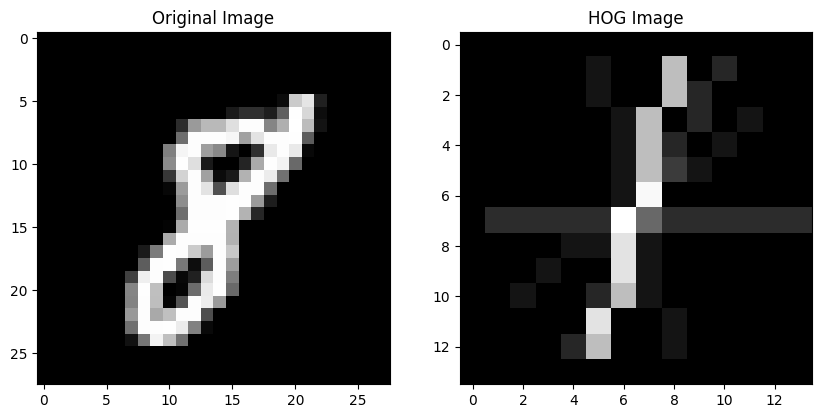

Feature vector: [0.49985065 0.49985065 0.49985065 0.         0.49985065 0.
 0.         0.02443988 0.         0.50698659 0.50698659 0.50698659
 0.14911388 0.41644954 0.13849974 0.07199792 0.00934612 0.09367707
 0.48919246 0.31355317 0.48919246 0.27163011 0.48919246 0.25229509
 0.13115347 0.         0.17064482 0.52745151 0.52745151 0.52745151
 0.         0.28624306 0.         0.         0.01240221 0.28861013
 0.47998762 0.47998762 0.47998762 0.12200709 0.24324494 0.13996353
 0.34047234 0.24647422 0.19626785 0.39538722 0.36289072 0.39538722
 0.13189628 0.39538722 0.24992341 0.39538722 0.39538722 0.08244215
 0.49357457 0.03787532 0.         0.         0.49357457 0.10576377
 0.49357457 0.1136488  0.49357457 0.41092142 0.38066427 0.41092142
 0.17405595 0.41092142 0.15704973 0.41092142 0.19941151 0.29145158
 0.4580659  0.4580659  0.4580659  0.01489469 0.4580659  0.
 0.31624079 0.24591143 0.        ]
Feature vector length: 81
Feature descriptor: [0.4580659  0.4580659  0.4580659  0.01489469 0.4

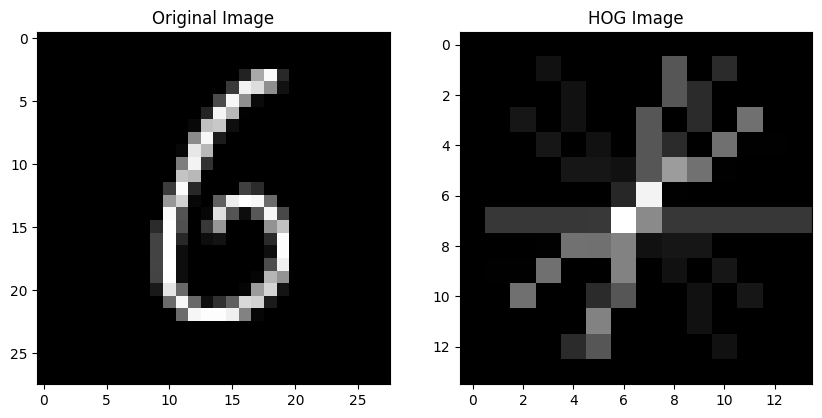

Feature vector: [0.48098422 0.36482306 0.48098422 0.07200255 0.48098422 0.05258874
 0.         0.         0.40609943 0.36295873 0.36295873 0.36295873
 0.36295873 0.36295873 0.20643524 0.36295873 0.18764649 0.36295873
 0.41571989 0.20551481 0.41571989 0.2099194  0.41571989 0.17950083
 0.41571989 0.13176432 0.41571989 0.43789017 0.30675948 0.43789017
 0.         0.43789017 0.43789017 0.28766641 0.         0.2369714
 0.39262516 0.39262516 0.39262516 0.34520494 0.25937031 0.26705345
 0.3306893  0.17058051 0.375934   0.38408733 0.38408733 0.38408733
 0.35516089 0.38408733 0.03340653 0.31465267 0.19006064 0.38408733
 0.47706599 0.48713692 0.48713692 0.         0.46659088 0.26074672
 0.10011353 0.         0.04565825 0.55012747 0.55012747 0.55012747
 0.         0.01970491 0.19168638 0.17787284 0.         0.15267156
 0.5549943  0.5549943  0.         0.         0.5549943  0.
 0.         0.         0.27557933]
Feature vector length: 81
Feature descriptor: [0.5549943  0.5549943  0.         0.     

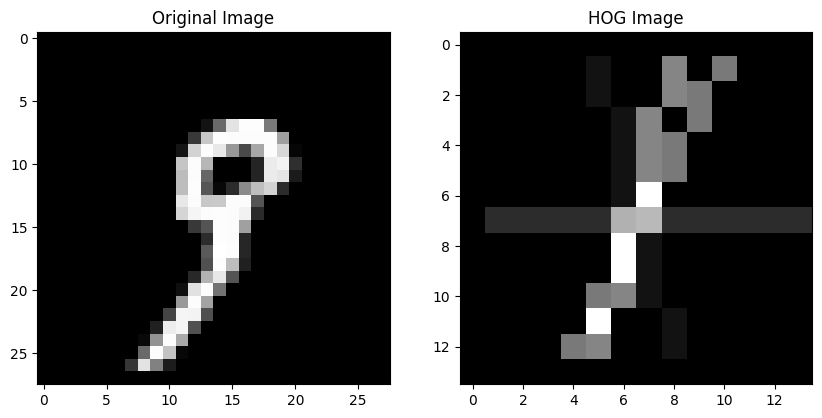

Feature vector: [4.49404698e-01 1.35903821e-01 0.00000000e+00 6.55157265e-02
 4.07669260e-01 5.64383272e-02 4.49404698e-01 4.49404698e-01
 4.49404698e-01 4.22974353e-01 4.17912497e-01 1.57750769e-01
 2.73141411e-01 4.22974353e-01 0.00000000e+00 1.27359017e-01
 4.22974353e-01 4.15830950e-01 5.09719722e-01 4.76753266e-01
 1.07307510e-01 1.93951394e-01 3.74387464e-01 0.00000000e+00
 1.45290767e-01 2.06568408e-01 5.09719722e-01 3.96656082e-01
 0.00000000e+00 2.65743280e-01 3.96656082e-01 3.96656082e-01
 7.64526049e-02 3.69939551e-01 3.96656082e-01 3.96656082e-01
 4.21590189e-01 1.54814090e-01 3.89986601e-01 4.21590189e-01
 4.21590189e-01 1.65763918e-01 3.67457998e-04 2.92424500e-01
 4.21590189e-01 5.48719416e-01 1.92946319e-01 8.04106266e-02
 2.11476639e-01 4.71174457e-01 1.23262175e-01 0.00000000e+00
 2.68697884e-01 5.48719416e-01 3.95539383e-01 0.00000000e+00
 3.95539383e-01 3.95539383e-01 3.95539383e-01 0.00000000e+00
 2.47571356e-01 3.95539383e-01 3.95539383e-01 3.94269091e-01
 0.00000

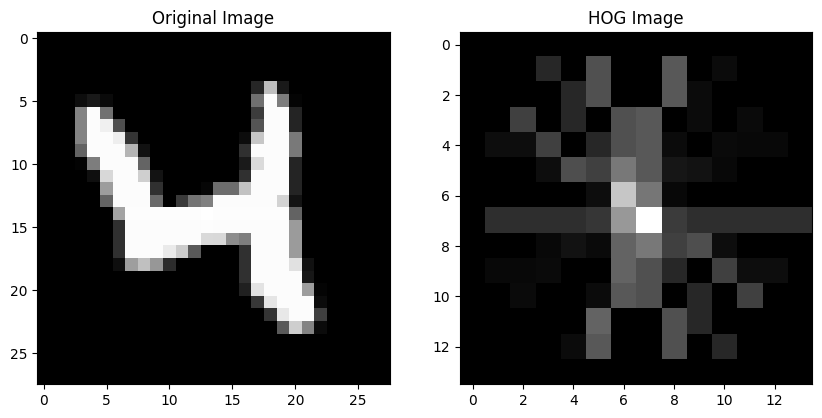

Feature vector: [0.53873541 0.19699137 0.53873541 0.30074423 0.53873541 0.00445985
 0.         0.         0.00445985 0.45163467 0.30795122 0.45163467
 0.42077469 0.45163467 0.09593639 0.08914386 0.1974749  0.24504351
 0.4245654  0.25490873 0.4245654  0.10541968 0.4245654  0.09875342
 0.28864776 0.33138396 0.4245654  0.46564921 0.46564921 0.46564921
 0.15026299 0.44347947 0.00218    0.         0.35438688 0.0682981
 0.42169501 0.4019511  0.42169501 0.3734848  0.42169501 0.05885015
 0.00435591 0.34032082 0.21485763 0.50595453 0.27879317 0.50595453
 0.22610297 0.29991367 0.00255223 0.00568003 0.11486885 0.50595453
 0.39681687 0.33511071 0.30147521 0.0904114  0.39681687 0.39118959
 0.39681687 0.39681687 0.07586481 0.40084803 0.33831568 0.40084803
 0.40084803 0.40084803 0.21858547 0.36666457 0.24617763 0.
 0.50170867 0.28195208 0.50170867 0.46600322 0.44705076 0.
 0.00815215 0.         0.        ]
Feature vector length: 81
Feature descriptor: [0.50170867 0.28195208 0.50170867 0.46600322 0.44

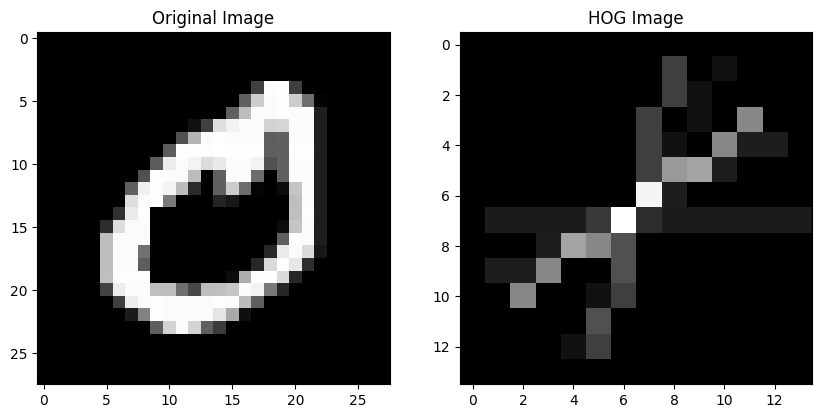

Feature vector: [0.5        0.5        0.5        0.         0.5        0.
 0.         0.         0.         0.50151056 0.50151056 0.50151056
 0.12459144 0.35852241 0.03511729 0.30375741 0.02055609 0.0864627
 0.4229254  0.4229254  0.4229254  0.12098228 0.4229254  0.04748376
 0.41072493 0.02779487 0.31333287 0.43107076 0.43107076 0.43107076
 0.22862333 0.43107076 0.1219183  0.29408081 0.152096   0.28277654
 0.54077929 0.54077929 0.54077929 0.11732309 0.20194433 0.10579483
 0.12891185 0.08089315 0.18377305 0.49679614 0.49679614 0.49679614
 0.         0.49679614 0.04153534 0.         0.02431293 0.10226469
 0.41568254 0.41568254 0.41568254 0.21704196 0.41568254 0.23798832
 0.27918356 0.14439128 0.32602782 0.48428343 0.48428343 0.48428343
 0.14812076 0.37065292 0.20388269 0.19052944 0.09854015 0.2224984
 0.52815975 0.52815975 0.40390822 0.         0.52815975 0.
 0.         0.         0.        ]
Feature vector length: 81
Feature descriptor: [0.52815975 0.52815975 0.40390822 0.         0.528

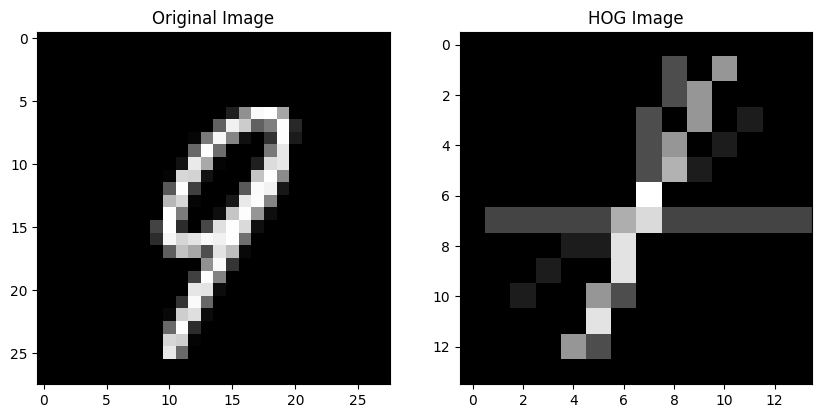

Feature vector: [0.70710678 0.         0.         0.         0.70710678 0.
 0.         0.         0.         0.49997988 0.49997988 0.49997988
 0.         0.49997988 0.         0.         0.         0.00896995
 0.48115989 0.48115989 0.48115989 0.         0.48115989 0.
 0.17105508 0.16676276 0.12988834 0.5        0.5        0.5
 0.         0.5        0.         0.         0.         0.
 0.57473474 0.57473474 0.57473474 0.         0.09506787 0.00142193
 0.         0.         0.         0.5        0.5        0.5
 0.         0.5        0.         0.         0.         0.
 0.47912095 0.47912095 0.47912095 0.         0.47912095 0.
 0.16706016 0.1201975  0.19853443 0.54878305 0.54878305 0.54878305
 0.         0.20395278 0.00179195 0.13689929 0.09849717 0.16269123
 0.5        0.5        0.5        0.         0.5        0.
 0.         0.         0.        ]
Feature vector length: 81
Feature descriptor: [0.5 0.5 0.5 0.  0.5 0.  0.  0.  0. ]
Feature descriptor length: 9


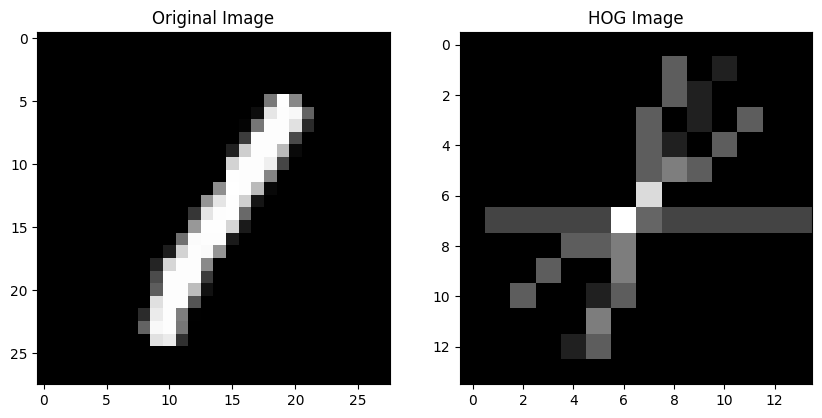

Feature vector: [0.20073166 0.21484089 0.50645546 0.50645546 0.50645546 0.
 0.05688571 0.         0.37526366 0.44613915 0.40052544 0.44613915
 0.42460229 0.40977451 0.09236463 0.16956158 0.08976045 0.21899212
 0.62560116 0.16243788 0.17938599 0.         0.62560116 0.14839705
 0.16656956 0.17064404 0.28247919 0.30589229 0.1238354  0.52638702
 0.52638702 0.52638702 0.10946372 0.03278922 0.         0.21630392
 0.43832282 0.11388847 0.43832282 0.43832282 0.43832282 0.07835187
 0.12789469 0.06244092 0.43832282 0.54677868 0.         0.10955796
 0.16750951 0.54677868 0.11721704 0.19320705 0.1093985  0.54677868
 0.34037383 0.12055961 0.52224404 0.52224404 0.52224404 0.
 0.17667628 0.14205641 0.         0.49937224 0.         0.45516649
 0.49937224 0.49937224 0.08770523 0.08169668 0.08185517 0.15374899
 0.50946556 0.         0.25993323 0.50946556 0.50946556 0.16327377
 0.26912167 0.15238319 0.17738042]
Feature vector length: 81
Feature descriptor: [0.50946556 0.         0.25993323 0.50946556 0.5

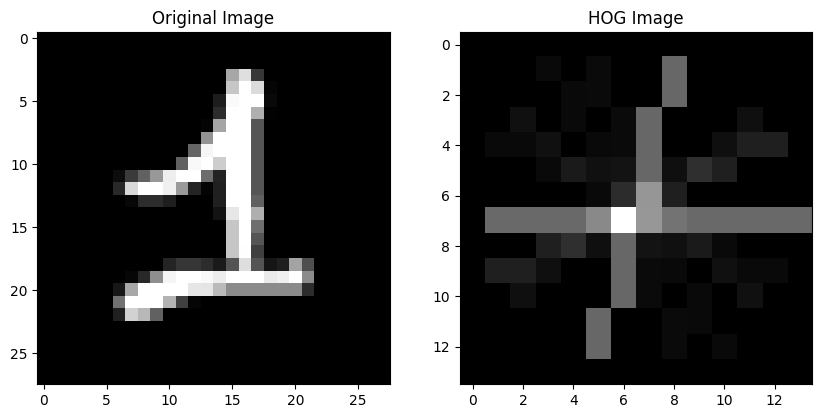

Feature vector: [0.48319769 0.09433097 0.48319769 0.48319769 0.48319769 0.12966349
 0.16488645 0.11481059 0.         0.3554381  0.15425635 0.44344048
 0.44344048 0.44344048 0.44344048 0.23764351 0.0826828  0.
 0.39559662 0.39559662 0.39559662 0.1967003  0.39559662 0.39559662
 0.39559662 0.11522799 0.09513888 0.44272853 0.44272853 0.44272853
 0.37250103 0.44272853 0.16477343 0.19826544 0.07141432 0.07516191
 0.22739699 0.34298931 0.51120045 0.51120045 0.51120045 0.15683685
 0.12201485 0.0710369  0.04625551 0.44530271 0.42283997 0.44530271
 0.44530271 0.44530271 0.071915   0.         0.14317305 0.04855996
 0.38626962 0.39441992 0.39441992 0.14665054 0.39441992 0.39441992
 0.39441992 0.15463135 0.16596136 0.31308106 0.22191985 0.48806249
 0.48806249 0.48806249 0.295945   0.21707994 0.02715235 0.05169584
 0.46696848 0.03670236 0.50799803 0.50799803 0.50799803 0.
 0.         0.05797918 0.05518876]
Feature vector length: 81
Feature descriptor: [0.46696848 0.03670236 0.50799803 0.50799803 0.5

KeyboardInterrupt: 

In [192]:
for image in x_train: # ERROR!
    # Apply HOG transformation to each image
    feature_vector, hog_image = hog_transformation_with_stride(image)

    # Bin the feature vector values
    bin_feature_values(feature_vector)

    plot_images(image, hog_image)

plt.show()